### **UNEMPLOYMENT ANALYSIS WITH PYTHON**

#### Our objective is to analyze the trends and factors influencing the unemployment rate, with a particular focus on the sharp increase observed during the Covid-19 pandemic. This analysis aims to understand the dynamics of the labor market, identify key drivers of unemployment, and provide insights into the economic impact of the pandemic on employment levels.

In [97]:
import pandas as pd

In [98]:
data = pd.read_csv("C:/Users/User/Downloads/Unemployment_Rate_upto_11_2020.csv")

In [99]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [100]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [101]:
data.columns = data.columns.str.strip()

In [102]:
data.rename(columns={'Region': 'State', 'Estimated Unemployment Rate (%)': 'Unemployment_Rate', 'Estimated Employed': 'Employed', 'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate', 'Region.1': 'Region'}, inplace=True)

In [103]:
data.head()

,State,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [104]:
data.columns

Index(['State', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation_Rate', 'Region', 'longitude', 'latitude'],
      dtype='object')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      267 non-null    object 
 1   Date                       267 non-null    object 
 2   Frequency                  267 non-null    object 
 3   Unemployment_Rate          267 non-null    float64
 4   Employed                   267 non-null    int64  
 5   Labour_Participation_Rate  267 non-null    float64
 6   Region                     267 non-null    object 
 7   longitude                  267 non-null    float64
 8   latitude                   267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [106]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('.', '')
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_4828\514896011.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [107]:
data.shape

(267, 9)

In [108]:
data.describe()

,Date,Unemployment_Rate,Employed,Labour_Participation_Rate,longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


In [109]:
data.isnull().sum()

State                        0
Date                         0
Frequency                    0
Unemployment_Rate            0
Employed                     0
Labour_Participation_Rate    0
Region                       0
longitude                    0
latitude                     0
dtype: int64

### **Visualization**

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

#### **Line Plot for Unemployment Rate Over Time**

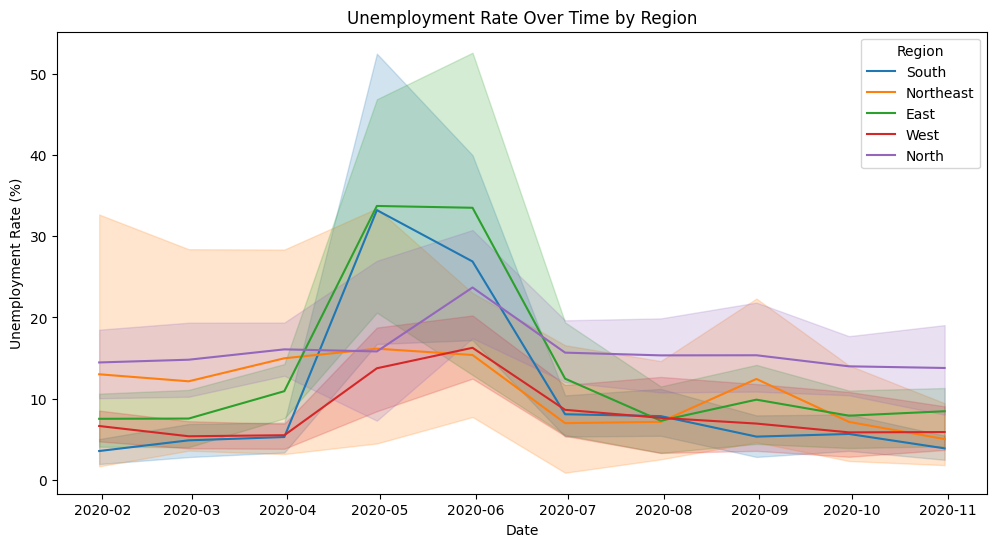

In [116]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Unemployment_Rate', hue='Region')
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region')
plt.show()

#### **Scatter Plot for Employment vs. Labour Participation Rate**

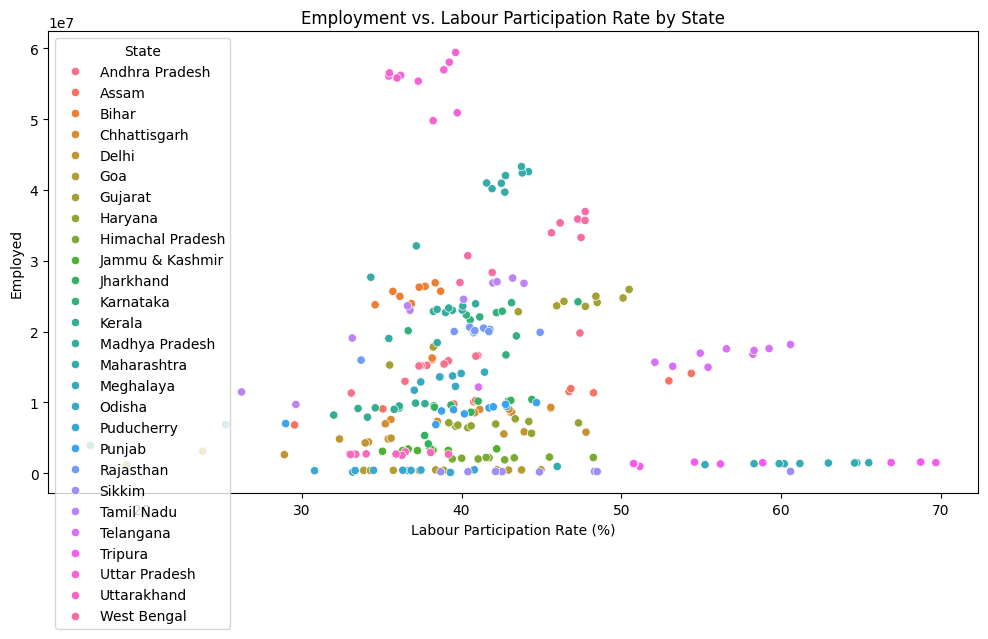

In [114]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Labour_Participation_Rate', y='Employed', hue='State')
plt.title('Employment vs. Labour Participation Rate by State')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Employed')
plt.legend(title='State')
plt.show()

#### **Histogram of Unemployment Rate**

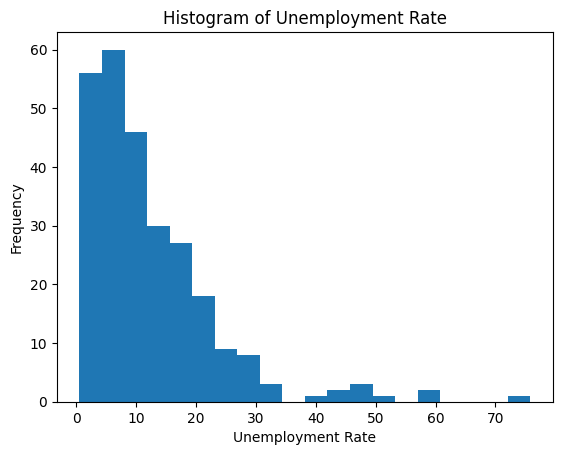

In [120]:
plt.hist(data['Unemployment_Rate'], bins=20)
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Unemployment Rate')
plt.show()

#### **Box plot**

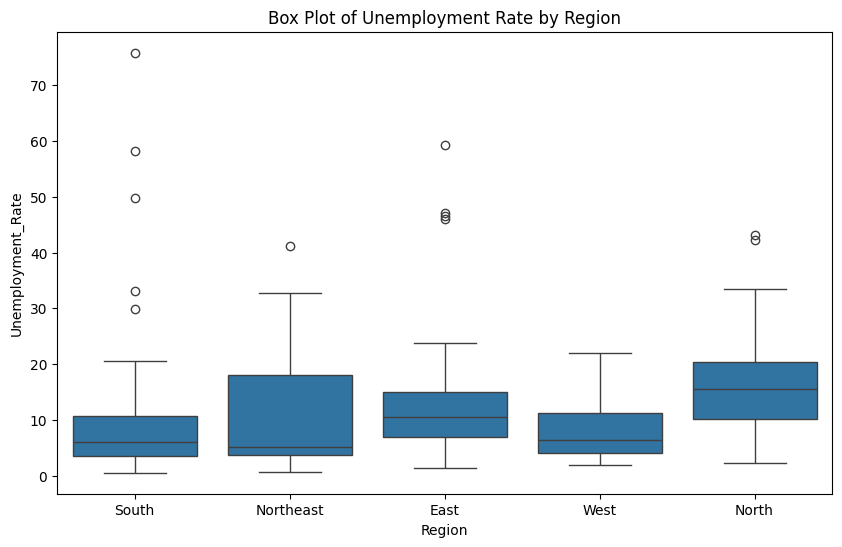

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Unemployment_Rate', data=data)
plt.title('Box Plot of Unemployment Rate by Region')
plt.show()

#### **Facet grid**

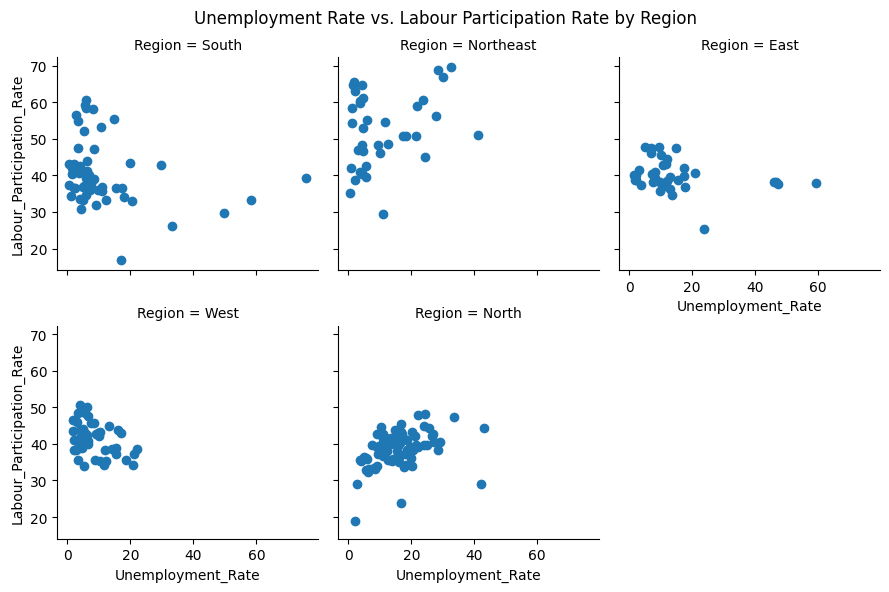

In [124]:
g = sns.FacetGrid(data, col='Region', col_wrap=3)
g.map(plt.scatter, 'Unemployment_Rate', 'Labour_Participation_Rate')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Unemployment Rate vs. Labour Participation Rate by Region')
plt.show()

#### **Pair plot**

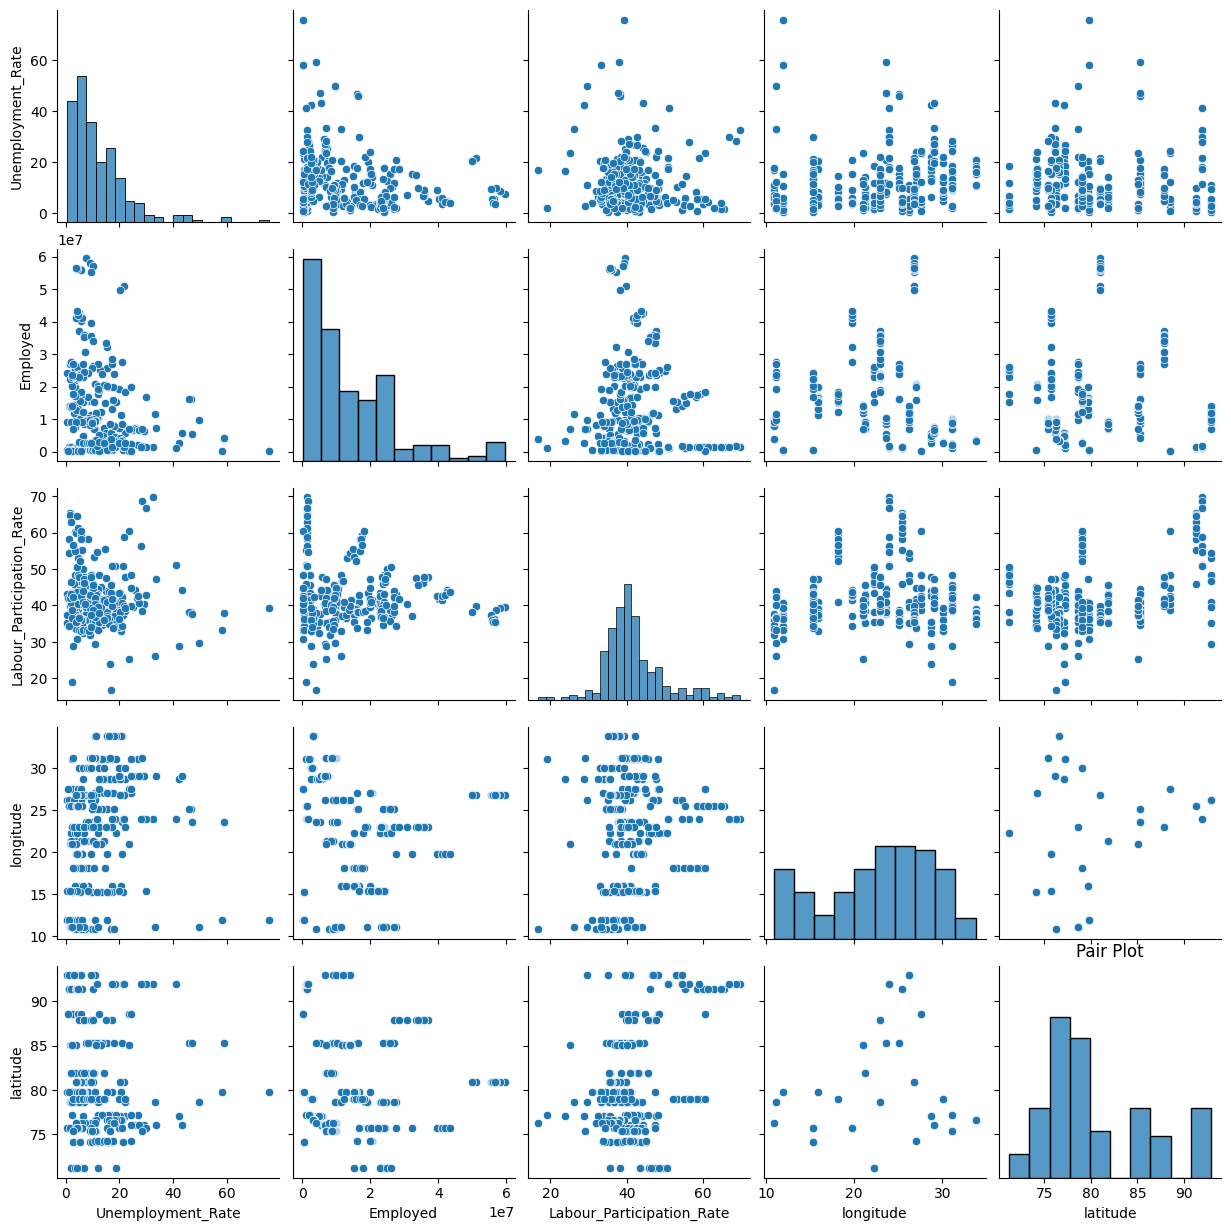

In [126]:
sns.pairplot(data)
plt.title('Pair Plot')
plt.show()

#### **3D Plots**

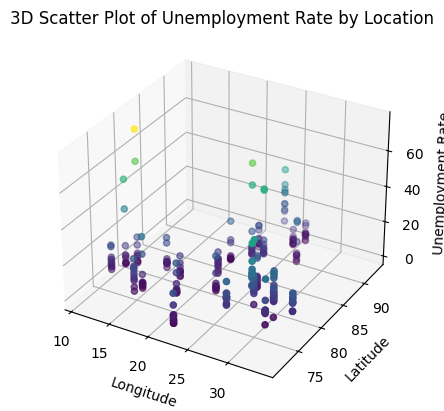

In [127]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['longitude'], data['latitude'], data['Unemployment_Rate'], c=data['Unemployment_Rate'], cmap='viridis')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Unemployment Rate')
plt.title('3D Scatter Plot of Unemployment Rate by Location')
plt.show()

### **Conclusion**

#### Our analysis of unemployment rates during the Covid-19 pandemic highlights a significant increase. The pandemic's economic impact underscores the need for targeted policy interventions to support affected workers and promote economic recovery.